In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Loading the dataset
df = pd.read_csv("D:\heart.csv")
df


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression Induced by Exercise,Slope of the Peak Exercise ST Segment,Number of Major Vessels Colored by Fluoroscopy,Thallium Stress Test Result,Diagnosis of Heart Disease,Heart Disease Type
0,42,0,0,103,246,1,0,147,1,1.418300,2,3,1,0,No
1,78,1,0,164,323,1,1,170,0,1.566190,1,3,0,1,Heart Failure
2,40,1,0,197,212,0,1,136,1,4.282330,0,3,1,1,Myocarditis
3,22,0,2,121,306,0,1,147,1,1.431177,2,3,2,1,Cardiomyopathy
4,57,1,1,134,284,0,2,219,1,2.717498,1,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,65,1,3,120,230,0,2,184,0,3.970895,0,3,2,0,No
9996,58,1,0,180,295,1,0,120,0,2.650137,0,3,1,0,No
9997,75,0,2,91,100,1,1,217,0,4.471365,2,0,2,0,No
9998,28,1,1,103,251,1,2,119,1,0.502705,1,2,0,1,Heart Attack


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             10000 non-null  int64  
 1   Sex                                             10000 non-null  int64  
 2   Chest Pain Type                                 10000 non-null  int64  
 3   Resting Blood Pressure                          10000 non-null  int64  
 4   Cholesterol                                     10000 non-null  int64  
 5   Fasting Blood Sugar                             10000 non-null  int64  
 6   Resting Electrocardiographic Results            10000 non-null  int64  
 7   Maximum Heart Rate Achieved                     10000 non-null  int64  
 8   Exercise Induced Angina                         10000 non-null  int64  
 9   ST Depression Induced by Exercise       

In [4]:
print(df.describe())

                Age           Sex  Chest Pain Type  Resting Blood Pressure  \
count  10000.000000  10000.000000     10000.000000            10000.000000   
mean      49.608300      0.503100         1.519000              144.184700   
std       17.330935      0.500015         1.126217               31.760511   
min       20.000000      0.000000         0.000000               90.000000   
25%       35.000000      0.000000         1.000000              117.000000   
50%       50.000000      1.000000         2.000000              144.000000   
75%       65.000000      1.000000         3.000000              172.000000   
max       79.000000      1.000000         3.000000              199.000000   

        Cholesterol  Fasting Blood Sugar  \
count  10000.000000         10000.000000   
mean     248.518500             0.496400   
std       86.764712             0.500012   
min      100.000000             0.000000   
25%      173.000000             0.000000   
50%      248.000000             0

In [5]:
#Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                                               0
Sex                                               0
Chest Pain Type                                   0
Resting Blood Pressure                            0
Cholesterol                                       0
Fasting Blood Sugar                               0
Resting Electrocardiographic Results              0
Maximum Heart Rate Achieved                       0
Exercise Induced Angina                           0
ST Depression Induced by Exercise                 0
Slope of the Peak Exercise ST Segment             0
Number of Major Vessels Colored by Fluoroscopy    0
Thallium Stress Test Result                       0
Diagnosis of Heart Disease                        0
Heart Disease Type                                0
dtype: int64


In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Heart Disease Type'], dtype='object')


In [7]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
X = df.drop(columns=['Heart Disease Type'])

In [9]:
df

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression Induced by Exercise,Slope of the Peak Exercise ST Segment,Number of Major Vessels Colored by Fluoroscopy,Thallium Stress Test Result,Diagnosis of Heart Disease,Heart Disease Type
0,42,0,0,103,246,1,0,147,1,1.418300,2,3,1,0,15
1,78,1,0,164,323,1,1,170,0,1.566190,1,3,0,1,9
2,40,1,0,197,212,0,1,136,1,4.282330,0,3,1,1,14
3,22,0,2,121,306,0,1,147,1,1.431177,2,3,2,1,4
4,57,1,1,134,284,0,2,219,1,2.717498,1,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,65,1,3,120,230,0,2,184,0,3.970895,0,3,2,0,15
9996,58,1,0,180,295,1,0,120,0,2.650137,0,3,1,0,15
9997,75,0,2,91,100,1,1,217,0,4.471365,2,0,2,0,15
9998,28,1,1,103,251,1,2,119,1,0.502705,1,2,0,1,8


In [10]:
print(df['Heart Disease Type'].unique())


[15  9 14  4  7 19 17  5 18 12 13  6 20  0  2  8 11  1 16  3 10]


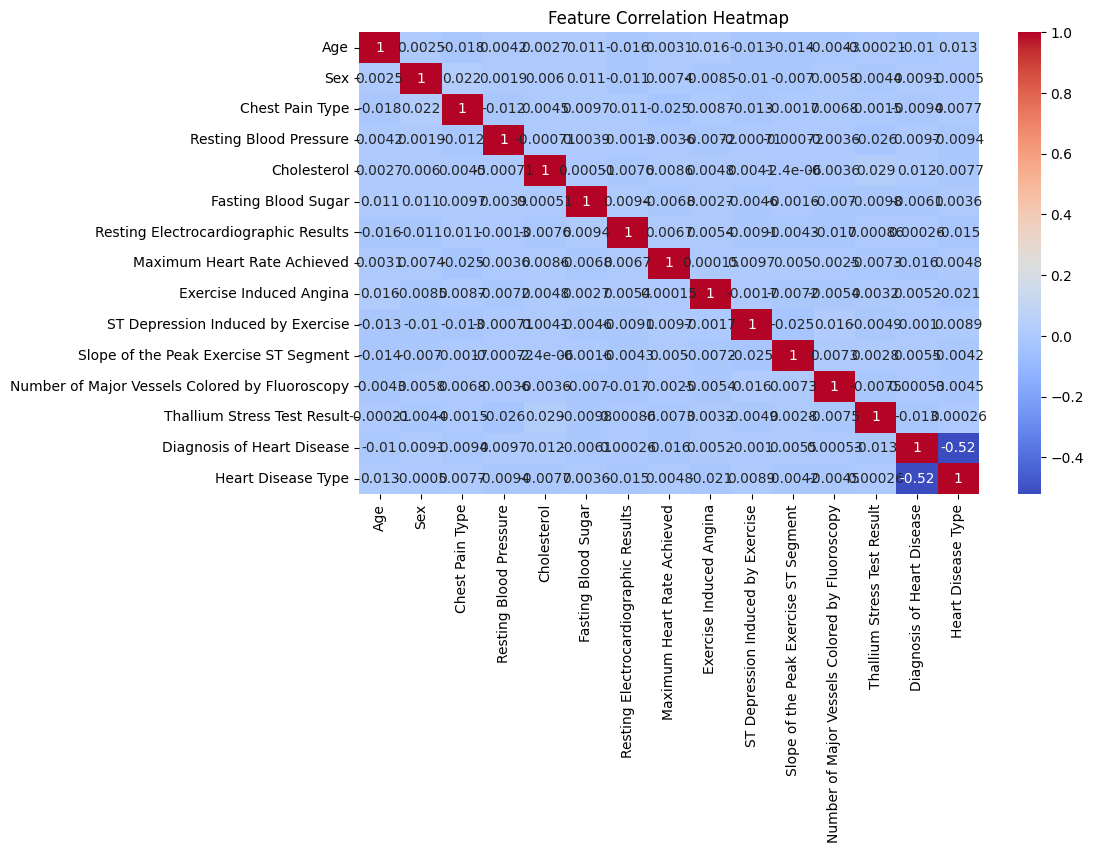

In [11]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\sanje\AppData\Local\Temp\ipykernel_460\1093294002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Heart Disease Type'], palette="viridis")


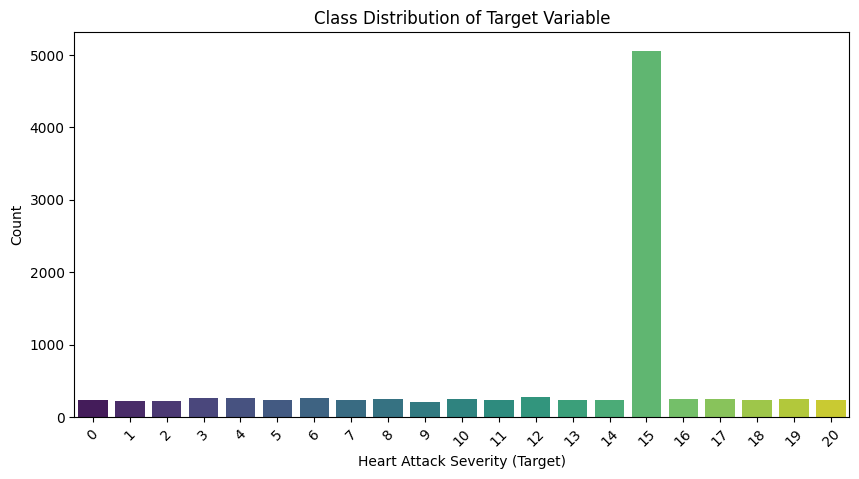

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Heart Disease Type'], palette="viridis")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Heart Attack Severity (Target)")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


C:\Users\sanje\AppData\Local\Temp\ipykernel_460\1316943620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Heart Disease Type'], y=df['Age'], palette="coolwarm")


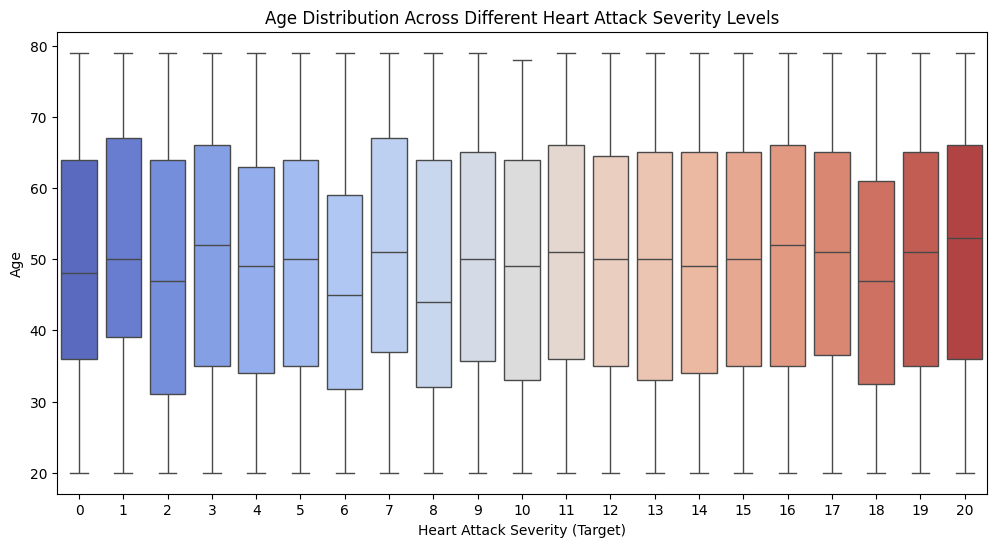

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Heart Disease Type'], y=df['Age'], palette="coolwarm")
plt.title("Age Distribution Across Different Heart Attack Severity Levels")
plt.xlabel("Heart Attack Severity (Target)")
plt.ylabel("Age")
plt.show()


In [14]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Heart Disease Type'])  # Features (all except target)
y = df['Heart Disease Type']  # Target variable


In [40]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
# Predictions
y_pred = model.predict(X_test)
y_pred


array([19, 16,  1, 15, 15, 19, 15, 10, 17, 15, 15, 15, 10, 17, 15, 15, 15,
       15, 15, 15,  2,  9, 19, 15, 15, 15,  7, 15, 15, 11, 15,  5, 15, 14,
        4,  6, 12, 15,  6, 10, 16, 13,  4, 15, 14, 15, 10, 20,  0, 15, 15,
       15,  1,  4, 15, 15, 15,  6,  1, 15,  1, 15, 11, 15, 15, 15, 15,  7,
        2,  4, 15,  9,  8, 15, 15,  4, 16, 15, 15,  1, 15, 15, 20,  7, 15,
       15, 15, 19, 15,  3, 15, 15,  8, 18, 15, 16, 20, 15, 15, 15, 15, 15,
       15, 15, 15,  7,  1, 15, 15, 15,  4, 15, 15, 15, 15, 15, 15,  4, 13,
       15, 12, 10,  6, 15,  5,  5, 15,  1, 15,  0, 15, 16, 15, 15,  6, 15,
       15, 15,  2, 12,  3,  7, 15, 15,  0, 15,  1, 15,  6,  7,  4, 15, 16,
       17,  0,  4, 15, 15,  9, 15, 15,  6,  6,  7, 15, 15, 20,  5, 15, 14,
        9, 15, 15,  9, 15, 12,  4, 15,  2, 15,  4, 15,  5,  1, 15,  0, 15,
        3, 19, 14, 15,  5, 15,  6, 15,  4, 16, 15,  2, 16,  4, 12,  5, 15,
       15, 18,  2, 15, 15, 15, 19, 15, 15, 15, 15, 13,  3, 15,  1,  6,  0,
        6, 15, 10, 15,  7

In [44]:
np.set_printoptions(threshold=np.inf)  # Allows full array printing
print(y_pred)

[19 16  1 15 15 19 15 10 17 15 15 15 10 17 15 15 15 15 15 15  2  9 19 15
 15 15  7 15 15 11 15  5 15 14  4  6 12 15  6 10 16 13  4 15 14 15 10 20
  0 15 15 15  1  4 15 15 15  6  1 15  1 15 11 15 15 15 15  7  2  4 15  9
  8 15 15  4 16 15 15  1 15 15 20  7 15 15 15 19 15  3 15 15  8 18 15 16
 20 15 15 15 15 15 15 15 15  7  1 15 15 15  4 15 15 15 15 15 15  4 13 15
 12 10  6 15  5  5 15  1 15  0 15 16 15 15  6 15 15 15  2 12  3  7 15 15
  0 15  1 15  6  7  4 15 16 17  0  4 15 15  9 15 15  6  6  7 15 15 20  5
 15 14  9 15 15  9 15 12  4 15  2 15  4 15  5  1 15  0 15  3 19 14 15  5
 15  6 15  4 16 15  2 16  4 12  5 15 15 18  2 15 15 15 19 15 15 15 15 13
  3 15  1  6  0  6 15 10 15  7 15 15 15  9 15 15 19 16  5 16 18  9 13 20
 11 10 15  6 15 11 12 15  1 15 15 11 15 10 15 17  3 11 15 15 18  3  7  3
 15  6  2 15 15 16 15 11 12  4  0  4 15 15  7  8  3 15  6  8 19 15 15 14
 15 15 15 15  3 15 15 15 15  0 15 15 15 15 15  7 10 15 15 15 15  7  1 15
  5  6 15 17  2  2 20 14  5  6  7 15  8 15 10 15  3

In [45]:
# Evaluation Of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5253333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.06      0.06        78
           1       0.05      0.06      0.05        71
           2       0.08      0.07      0.07        73
           3       0.05      0.04      0.05        89
           4       0.08      0.11      0.09        85
           5       0.04      0.06      0.05        68
           6       0.05      0.08      0.06        76
           7       0.11      0.09      0.10        76
           8       0.03      0.03      0.03        80
           9       0.05      0.05      0.05        63
          10       0.10      0.12      0.11        66
          11       0.13      0.12      0.13        72
          12       0.03      0.02      0.02        95
          13       0.08      0.05      0.06        82
          14       0.05      0.04      0.04        81
          15       1.00      1.00      1.00      1489
          16       0.06     